# Proyecto 1 Etapa 1

## Integrantes 

- Alejandro lancheros - 202122797
- Mateo Calderón Rincón - 202213589
- Laura Valentina Lara Díaz - 201912967

## 1. Lectura y Comprensión del Enunciado

El proyecto B "Optimización en la Planificación de Entregas Salva Vidas con Flota Híbrida para LogistiCo" aborda un reto de distribución que enfrenta Rural/Offshore Logistics, una de las tres divisiones principales de LogistiCo, una empresa que se dedicada, entre otras cosas, al transporte de insumos médicos y productos esenciales en la región de La Guajira, Colombia. Este territorio se caracteriza por su geografía extensa, condiciones climáticas adversas y la dispersión de comunidades en zonas remotas, lo cual dificulta la cobertura eficiente y oportuna de la demanda.

Garantizar el acceso equitativo a recursos críticos en estas comunidades es una necesidad urgente. En este contexto, LogistiCo cuenta con una flota híbrida de camionetas y drones para realizar sus entregas. Esta situación se puede abstraer como un problema de optimización, en el que se busca minimizar el costo total del servicio logístico, garantizando la cobertura completa de la demanda, el respeto por ventanas de tiempo y las capacidades físicas de los vehículos.

Además, el modelo debe contemplar la posibilidad de múltiples viajes por parte de los vehículos, ya que la flota disponible puede no ser suficiente para cubrir todas las entregas en un solo recorrido. Este factor agrega una dimensión adicional al problema, al requerir la planificación de rutas con retornos al centro de distribución para reabastecimiento.

Se deben considerar múltiples restricciones operativas, entre ellas: las capacidades y rangos útiles de los vehículos, las limitaciones impuestas por las condiciones geográficas y climáticas, los horarios de recepción en cada destino, y los costos variables por kilómetro en función del tipo de transporte utilizado.

En síntesis, se trata de un problema de ruteo con ventanas de tiempo y flota híbrida, que requiere un enfoque metodológico riguroso, apoyado en herramientas de análisis operacional, para proponer soluciones viables que tengan un impacto real en la eficiencia de las operaciones de LogistiCo y, en última instancia, en el bienestar de las comunidades atendidas.

## 2. Identificación de Elementos Clave

- **Componentes esenciales del sistema:**

Clientes o comunidades a atender.

Flota compuesta por camionetas y drones.

Capacidad, alcance y restricciones de cada tipo de vehículo.

Tiempos máximos y mínimos de entrega (ventanas de tiempo).

Costos asociados: fijos, mantenimiento, combustible, penalizaciones.

- **Limitaciones físicas:**

Los drones tienen un alcance limitado y una capacidad de carga menor.

Las camionetas, aunque más capaces, requieren rutas terrestres transitables.

Las distancias y tiempos de viaje deben respetar las ventanas de servicio del cliente.

- **Limitaciones organizacionales:**

Los recursos logísticos (vehículos) son limitados.

Se prioriza la minimización de costos, sin sacrificar la calidad del servicio.

Penalizaciones económicas si se incumplen ventanas de tiempo.

## 3. Formulación de la Estructura del Modelo

---

#### **Conjuntos**

- **𝐼**: Conjunto de clientes o comunidades.  
- **𝑉**: Conjunto de vehículos disponibles.

Los conjuntos definen los elementos principales del problema y establecen la estructura básica sobre la cual opera el modelo. 

El conjunto I representa a los clientes o comunidades que requieren insumos. Su inclusión es de gran importancia porque cada cliente tiene una demanda específica que debe ser satisfecha dentro de ciertas restricciones, como ventanas de tiempo y disponibilidad de recursos. Por otro lado, el conjunto agrupa los vehículos disponibles para la distribución. Esta diferenciación es de vital importancia ya que cada tipo de vehículo puede tener características distintas, como capacidades de carga, costos operativos y autonomía. La definición de estos conjuntos permite modelar la relación entre los clientes y los vehículos de manera eficiente.

---

#### **Parámetros**

$$
\text{Dist}_{iv} = \text{Distancia del depósito al cliente } i \text{ usando el vehículo } v
$$

$$
F_t = \text{Tarifa fija de flete}
$$

$$
C_m = \text{Costo de mantenimiento por kilómetro}
$$

$$
P_f = \text{Precio del combustible}
$$

$$
R_v = \text{Rendimiento de combustible del vehículo } v
$$

$$
T_{\min,i}, T_{\max,i} = \text{Ventana de tiempo de atención del cliente } i
$$

$$
\text{Demanda}_i = \text{Cantidad de insumos que requiere el cliente } i
$$

$$
\text{Cap}_v = \text{Capacidad de carga del vehículo } v
$$

$$
\text{Rango}_v = \text{Rango máximo que puede recorrer el vehículo } v
$$

Los parámetros establecen valores fijos que influyen en las decisiones del modelo y ayudan a representar las condiciones operativas de la empresa. La distancia entre el depósito y cada cliente es un parámetro clave, ya que determina el costo y la viabilidad de cada ruta. Para modelar los costos de transporte, se incluyen la tarifa fija de flete, el costo de mantenimiento por kilómetro y el precio del combustible, los cuales afectan directamente la rentabilidad de las operaciones. Además, el rendimiento de combustible del vehículo permite calcular el consumo energético y optimizar la eficiencia. Otro conjunto de parámetros relevantes son las ventanas de tiempo de los clientes ( 𝑇 min ⁡ , 𝑖 , 𝑇 max ​), que garantizan que las entregas se realicen dentro de un horario establecido, evitando retrasos o incumplimientos. La demanda de cada cliente es otro parámetro fundamental, ya que el modelo debe asegurar que se entregue la cantidad correcta de insumos a cada destino. Por último, la capacidad de carga de los vehículos y su rango máximo de recorrido imponen restricciones físicas que limitan la cantidad de mercancía que puede transportarse y la distancia que puede recorrerse en una única operación.

---

#### **Variables de Decisión**

- **𝑥ᵢᵥ ∈ {0,1}**: Indica si el vehículo *v* atiende al cliente *i*.  

Las variables de decisión representan las elecciones estratégicas dentro del modelo y permiten determinar cómo se asignan los recursos disponibles. La variable binaria ​ indica si el vehículo v atiende al cliente  i. Su inclusión es crucial, ya que define las rutas de distribución y garantiza que todos los clientes sean atendidos de manera óptima.

---

#### **Variables Auxiliares**

- **𝛿ᵥ**: Toma valor 1 si el vehículo *v* es camioneta, y 0 si es dron.

Las variables auxiliares ayudan a modelar el comportamiento de los vehículos en función de sus características. La variable 𝛿 toma el valor de 1 si el vehículo v es una camioneta y 0 si es un dron. Esto permite diferenciar entre distintos tipos de vehículos y aplicar restricciones específicas a cada uno sin perder flexibilidad en la formulación del modelo. En conjunto, la definición de estas variables facilita la optimización del transporte, asegurando que los vehículos asignados a cada ruta cumplan con los requerimientos de capacidad, distancia y demanda de los clientes.


### Formulación de Restricciones:

#### **Ventanas de Tiempo:**

Esta restricción asegura que cada cliente i sea atendido dentro de su ventana de tiempo especificada. El tiempo de llegada del vehículo v al cliente i, debe estar dentro de este rango. Esto garantiza que las entregas se realicen en el horario permitido.

$T_{min,i} \leq t_{iv} \leq T_{max,i} \quad \forall i \in I,\; \forall v \in V$

#### **Capacidad de los Vehículos:**

Esta restricción garantiza que la cantidad total de productos transportados por un vehículo v no exceda su capacidad máxima Cap_v. Se calcula sumando la demanda Demanda i ​ de cada cliente atendido por el vehículo v, ponderada por la variable binaria, que indica si el vehículo v atiende al cliente i.

$\sum_{i \in I} Demanda_i \cdot x_{iv} \leq Cap_v \quad \forall v \in V$

#### **Autonomía de los Vehículos:**

Esta restricción impone un límite en la distancia total recorrida por cada vehículo v. La suma de las distancias ​ recorridas al atender a los clientes no debe superar el rango máximo de operación Rango v. Esto asegura que los vehículos no superen su autonomía antes de completar las entregas.

$\sum_{i \in I} Dist_{iv} \cdot x_{iv} \leq Rango_v \quad \forall v \in V$

#### **Restricción de Origen Único**
Todas las entregas parten desde el depósito en **Riohacha**:

$$
\sum_{j \in I} x_{0jv} = 1, \quad \forall v \in V
$$

donde:
- $x_{0jv} = 1$ significa que el vehículo $v$ debe salir del depósito $0$.

## 4. Preprocesamiento de datos

A continuación se encuentra el código para calcular la distancia entre los distintos puntos para la camioneta, ya que es sabido que no existen carreteras en línea recta entre los clientes y el punto de distribución, por ello se hace uso del API de OpenRouteService que permite calcular el tiempo y la distancia entre dos puntos basandose en los caminos existentes. 

Se definen los nodos como 0 (origen) y 1, 2 y 3 (clientes)

Por ello, a continuación se tiene el código que calcula el tiempo y la distancia entre los puntos basandose en la longitud y latitud de cada uno, se quiere obtener una matriz con estos datos. Cabe resaltar, que también se define que si el API retorna error a la hora de calcular algún camino, se considera que no es posible llegar hasta allí mediante camioneta y se completa la matriz con valores altos en esos casos.

In [11]:
import requests

# API key
api_key = '5b3ce3597851110001cf6248be808c25e2964fb2b3e74f3c74d8ce63'

headers = {
    'Authorization': api_key,
    'Content-Type': 'application/json'
}

# Nodos
nodes = {
    0: (-72.9071, 11.5449), # Origen
    1: (-72.8500, 11.6000), # Destino 1
    2: (-72.9200, 11.5200), # Destino 2
    3: (-72.8800, 11.5800) # Destino 3
}

url = 'https://api.openrouteservice.org/v2/directions/driving-car'

# Diccionario para almacenar resultados
dtcamioneta = {}

for i, coords_i in nodes.items():
    for j, coords_j in nodes.items():
        # Si son el mismo nodo
        if i == j:
            dtcamioneta[(i, j)] = (999, 999)
            continue
            
        start = f"{coords_i[0]},{coords_i[1]}"
        end = f"{coords_j[0]},{coords_j[1]}"

        params = {
            'start': start,
            'end': end
        }

        response = requests.get(url, headers=headers, params=params)

        if response.status_code == 200:
            data = response.json()
            segmento = data['features'][0]['properties']['segments'][0]
            distance = round(segmento['distance'] / 1000, 2)
            duration = round(segmento['duration'] / 60, 2)
            dtcamioneta[(i, j)] = (distance, duration)
        else:
            try:
                error_message = response.json().get("error", {}).get("message", "")
            except Exception:
                error_message = ""
            if "Could not find routable point" in error_message:
                dtcamioneta[(i, j)] = (999, 999)
            else:
                dtcamioneta[(i, j)] = (999, 999)



En la tabla siguiente se tienen los resultados calculados por el API, para las diagonales al igual que para cuando se tienen los valores al cliente 3 se tienen valores muy grandes queriendo reflejar lo mencionado anteriormente.

In [25]:
from tabulate import tabulate

# Determinar el número máximo de filas y columnas
max_fila = max(key[0] for key in dtcamioneta.keys())
max_col = max(key[1] for key in dtcamioneta.keys())

# Creamos la tabla: cada celda tendrá "distancia, costo"
tabla = []
for i in range(0, max_fila+1):
    fila = []
    for j in range(0, max_col+1):
        # Formateamos la salida en cada celda
        dist, costo = dtcamioneta.get((i, j), (None, None))
        celda = f"{dist} km, {costo} min" if dist is not None else ""
        fila.append(celda)
    tabla.append(fila)

# Imprimir la tabla con tabulate
print("DISTANCIA VS TIEMPO CON CAMIONETA")
print(tabulate(tabla, headers=[f"Dest {j}" for j in range(0, max_col+1)], tablefmt="grid", showindex=[f"Orig {i}" for i in range(0, max_fila+1)]))


DISTANCIA VS TIEMPO CON CAMIONETA
+--------+---------------------+---------------------+---------------------+-----------------+
|        | Dest 0              | Dest 1              | Dest 2              | Dest 3          |
+========+=====================+=====================+=====================+=================+
| Orig 0 | 999 km, 999 min     | 21.08 km, 27.03 min | 4.3 km, 7.89 min    | 999 km, 999 min |
+--------+---------------------+---------------------+---------------------+-----------------+
| Orig 1 | 21.17 km, 27.48 min | 999 km, 999 min     | 22.98 km, 34.06 min | 999 km, 999 min |
+--------+---------------------+---------------------+---------------------+-----------------+
| Orig 2 | 4.49 km, 8.6 min    | 22.98 km, 34.06 min | 999 km, 999 min     | 999 km, 999 min |
+--------+---------------------+---------------------+---------------------+-----------------+
| Orig 3 | 999 km, 999 min     | 999 km, 999 min     | 999 km, 999 min     | 999 km, 999 min |
+--------+------

Este es el código para calcular la distancia de los drones, es importante tener en cuenta que los drones al moverse por aire, pueden ir de un punto a otro en línea recta. Para ello se usa la función Haversine que permite encontrar la distancia de dos puntos dada su latitud y longitud.

Es importante mencionar que se decidió de poner una velocidad de 105 km/h ya que en el proyecto de Zipline se mencionaba que la velocidad de los drones era similar a lo que se puso, esto después de promediar las dos velocidades que se informaban en la página web, pasarla a km/h y redondearla.

In [19]:
import math

# Función para calcular la distancia entre dos puntos geográficos usando longitud y latitud
def haversine(coord1, coord2):

    lon1, lat1 = coord1
    lon2, lat2 = coord2
    
    R = 6371.0
    
    # Grados a radianes
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    
    # Fórmula matemática
    a = math.sin(delta_phi/2)**2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    distance = R * c
    return distance


nodes = {
    0: (-72.9071, 11.5449),
    1: (-72.8500, 11.6000),
    2: (-72.9200, 11.5200),
    3: (-72.8800, 11.5800)
}

drone_speed_kmph = 105
drone_speed_km_min = drone_speed_kmph / 60.0  # km por minuto

# Diccionario para almacenar los resultados
dtdron = {}

for i, coord_i in nodes.items():
    for j, coord_j in nodes.items():
        # Si son el mismo nodo
        if i == j:
            dtdron[(i, j)] = (999, 999)
        else:
            distance_km = haversine(coord_i, coord_j)
            duration_min = distance_km / drone_speed_km_min  # Tiempo en minutos
            dtdron[(i, j)] = (round(distance_km, 3), round(duration_min, 3))
            


En la tabla a continuación se puede ver que ya se tienen valores de tiempo y distancia para el cliente 3

In [24]:
from tabulate import tabulate

# Determinar el número máximo de filas y columnas
max_fila = max(key[0] for key in dtdron.keys())
max_col = max(key[1] for key in dtdron.keys())

# Creamos la tabla: cada celda tendrá "distancia, costo"
tabla = []
for i in range(0, max_fila+1):
    fila = []
    for j in range(0, max_col+1):
        # Formateamos la salida en cada celda
        dist, costo = dtdron.get((i, j), (None, None))
        celda = f"{dist} km, {costo} min" if dist is not None else ""
        fila.append(celda)
    tabla.append(fila)

# Imprimir la tabla con tabulate
print("DISTANCIA VS TIEMPO CON DRONE")
print(tabulate(tabla, headers=[f"Dest {j}" for j in range(0, max_col+1)], tablefmt="grid", showindex=[f"Orig {i}" for i in range(0, max_fila+1)]))


DISTANCIA VS TIEMPO CON DRONE
+--------+---------------------+----------------------+----------------------+---------------------+
|        | Dest 0              | Dest 1               | Dest 2               | Dest 3              |
+========+=====================+======================+======================+=====================+
| Orig 0 | 999 km, 999 min     | 8.731 km, 4.989 min  | 3.105 km, 1.774 min  | 4.894 km, 2.796 min |
+--------+---------------------+----------------------+----------------------+---------------------+
| Orig 1 | 8.731 km, 4.989 min | 999 km, 999 min      | 11.717 km, 6.695 min | 3.953 km, 2.259 min |
+--------+---------------------+----------------------+----------------------+---------------------+
| Orig 2 | 3.105 km, 1.774 min | 11.717 km, 6.695 min | 999 km, 999 min      | 7.969 km, 4.554 min |
+--------+---------------------+----------------------+----------------------+---------------------+
| Orig 3 | 4.894 km, 2.796 min | 3.953 km, 2.259 min  | 7.969

Es importante obtener los costos que representa el hecho de llevar los productos en la camioneta, ya que una persona debe conducir el vehiculo, además de que se tienen costos asociados al combustible, el flete que se paga al dueño (considerando que la compañia no es la dueña del vehiculo) y el costo del mantenimiento. 

Primero se obtuvo un valor tentativo sobre el salario medio que obtiene un transportador de carga por hora, el cual es de $9.600 COP, como los trayectos están definidos en minutos, entonces este valor se pasa a minutos, y se obtiene una matriz de distancia vs costos asociados al personal.

Luego, se obtienen los datos proporcionados por el enunciado respecto al valor del combustible, la tarifa del flete y el mantenimiento, como el valor de combustible estaba sobre litros, era necesario cambiar ese valor al costo sobre Km recorrido, por lo que se hizo una regla de tres para obtener este valor basado en información encontrada. De allí se saca el costo por Km recorrido y se multiplica por la distancia que se recorre. Haciendo una matriz de distancia vs Costo de transporte

In [21]:
# Valor obtenido en internet
costoHora = 9600
costoMin = costoHora / 60

costosCamioneta1 = { key: (dist, tiempo * costoMin) for key, (dist, tiempo) in dtcamioneta.items() }



# Valor de las tablas
precioCombustible = 15000
tarifaFlete = 5000
costoMantenimiento = 700
combustibleKm = precioCombustible / 1000

costoKm = tarifaFlete + costoMantenimiento + combustibleKm 


costosCamioneta2 = {
    key: (round(dist, 3), round(dist * costoKm, 3))
    for key, (dist, tiempo) in dtcamioneta.items()
}





In [22]:
from tabulate import tabulate

# Determinar el número máximo de filas y columnas
max_fila = max(key[0] for key in costosCamioneta1.keys())
max_col = max(key[1] for key in costosCamioneta1.keys())

# Creamos la tabla: cada celda tendrá "distancia, costo"
tabla = []
for i in range(1, max_fila+1):
    fila = []
    for j in range(1, max_col+1):
        # Formateamos la salida en cada celda
        dist, costo = costosCamioneta1.get((i, j), (None, None))
        celda = f"{dist} km, {costo} COP" if dist is not None else ""
        fila.append(celda)
    tabla.append(fila)

# Imprimir la tabla con tabulate
print("DISTANCIA VS COSTO EMPLEADO")
print(tabulate(tabla, headers=[f"Dest {j}" for j in range(1, max_col+1)], tablefmt="grid", showindex=[f"Orig {i}" for i in range(1, max_fila+1)]))


DISTANCIA VS COSTO EMPLEADO
+--------+----------------------+----------------------+----------------------+
|        | Dest 1               | Dest 2               | Dest 3               |
+========+======================+======================+======================+
| Orig 1 | 999 km, 159840.0 COP | 22.98 km, 5449.6 COP | 999 km, 159840.0 COP |
+--------+----------------------+----------------------+----------------------+
| Orig 2 | 22.98 km, 5449.6 COP | 999 km, 159840.0 COP | 999 km, 159840.0 COP |
+--------+----------------------+----------------------+----------------------+
| Orig 3 | 999 km, 159840.0 COP | 999 km, 159840.0 COP | 999 km, 159840.0 COP |
+--------+----------------------+----------------------+----------------------+


In [23]:
from tabulate import tabulate

# Determinar el número máximo de filas y columnas
max_fila = max(key[0] for key in costosCamioneta2.keys())
max_col = max(key[1] for key in costosCamioneta2.keys())

# Creamos la tabla: cada celda tendrá "distancia, costo"
tabla = []
for i in range(1, max_fila+1):
    fila = []
    for j in range(1, max_col+1):
        # Formateamos la salida en cada celda
        dist, costo = costosCamioneta2.get((i, j), (None, None))
        celda = f"{dist} km, {costo} COP" if dist is not None else ""
        fila.append(celda)
    tabla.append(fila)

# Imprimir la tabla con tabulate
print("DISTANCIA VS COSTO TRANSPORTE CAMIONETA")
print(tabulate(tabla, headers=[f"Dest {j}" for j in range(1, max_col+1)], tablefmt="grid", showindex=[f"Orig {i}" for i in range(1, max_fila+1)]))



DISTANCIA VS COSTO TRANSPORTE CAMIONETA
+--------+------------------------+------------------------+-----------------------+
|        | Dest 1                 | Dest 2                 | Dest 3                |
+========+========================+========================+=======================+
| Orig 1 | 999 km, 5709285.0 COP  | 22.98 km, 131330.7 COP | 999 km, 5709285.0 COP |
+--------+------------------------+------------------------+-----------------------+
| Orig 2 | 22.98 km, 131330.7 COP | 999 km, 5709285.0 COP  | 999 km, 5709285.0 COP |
+--------+------------------------+------------------------+-----------------------+
| Orig 3 | 999 km, 5709285.0 COP  | 999 km, 5709285.0 COP  | 999 km, 5709285.0 COP |
+--------+------------------------+------------------------+-----------------------+


## 5. Desarrollo de la Función Objetivo

#### ¿Qué buscamos minimizar?

Como podemos observar el problema nos proporciona diferentes objetivos de optimizacion como lo es la distancia, el tiempo o costo. Teniendo en cuenta que estamos bajo un contexto donde es indispensable la llegada de las flotas a las diferentes zonas de la Guajira se propone que el mejor enfoque de optimizacion es para los costos, esto entiende todos aquellos costos operativos incluidos en la acció.

1. **Costo por tiempo**:
$$
\text{Tiempo (Minutos)} \times (\text{Tarifa de nomina (Pesos / Minutos)} 
$$

Se maneja el coste de la tarifa de nomina convencional regida en Colombia, este costo de nomina se encuentra en función del tiempo en el que toma dicho trabajo realizarce.

2. **Costo por combustible** (solo para camionetas):
$$
{\text{Distancia (Metros)}} \times{\text{Costo combustible (Pesos / Metros) }} 
$$

Se trabaja bajo el coste convencional de combustible para colombia el cual se maneja en relacion a la disancia realizada, se sabe que pueden existir otro factores mas alla que la distancia para evaluar el el gasto del combustible pero para simplicidad del ejercicio se decide manejar de esta forma.

---

### Formulación Simplificada de la Función Objetivo

$$
\min \sum_{v \in V} \sum_{i \in I} \sum_{j \in I} 
\Big( P_f \cdot Dist_{iv} \cdot 𝛿ᵥ + C_m + 𝛿ᵥ \cdot C_e + F_t + C_v \cdot t_{ij} \Big) x_{ijv} 
$$

donde:

- $x_{iv}$: variable binaria que vale 1 si el vehículo $v$ atiende al cliente $i$, y 0 en caso contrario.  
- $\text{Dist}_{iv}$: distancia entre el depósito y el cliente $i$ cuando es atendido por el vehículo $v$.  
- $Ft$: tarifa de operación fija por kilómetro ($5{,}000$ unidades monetarias).  
- $Cm$: costo de mantenimiento por kilómetro ($700$ unidades monetarias).  
- $Pf$: precio del combustible ($15{,}000$ unidades monetarias por litro).   
- $\delta_v$: parámetro que vale 1 si el vehículo $v$ es una camioneta, y 0 si es un dron (ya que los drones no consumen combustible). 
- $C_v$ es el costo por viaje
- $t_{ij}$ es el tiempo de viaje entre $i$ y $j$. 
- $C_e$ es el costo electrico

La formulación de la función objetivo se basa en los parámetros, conjuntos y variables previamente definidos. Para simplificar el ejercicio y cumplir con su propósito, todas las variables se expresan en términos de costos. Nuestra función objetivo permite evaluar escenarios en los que se utilice un dron o un vehículo todoterreno.  

Se decidió no incluir penalizaciones directamente en la función objetivo, sino considerarlas únicamente como restricciones. Esto se debe a que los productos a entregar son críticos y deben ser entregados sin excepción.

---


## 6. Validación y Análisis


## **Caso cumple**


- **Clientes**:  $I = {1, 2} $  
- **Vehículos**: $ V = A $ (una camioneta disponible)  
- **Capacidad de la camioneta A**: 50 unidades de carga  
- **Demanda de los clientes**:
  - Cliente 1: 30  unidades  
  - Cliente 2: 20  unidades  

Si el mismo vehículo atiende a ambos clientes en el mismo viaje, la carga total sería:

$$
30 + 20 = 50
$$

que es igual a la capacidad de la camioneta, por lo que el viaje es válido

### **Restricción de Capacidad**

La restricción que garantiza que la carga transportada no supere la capacidad del vehículo es:

$$
\sum_{i \in I} \text{Demanda}_i \cdot x_{iv} \leq \text{Cap}_v, \quad \forall v \in V
$$

Sustituyendo los valores en este caso:

$$
30 \cdot x_{1A} + 20 \cdot x_{2A} \leq 50
$$


Si  $x_{1A} = 1$  y  $x_{2A} = 1$ , entonces: 


$$
30 + 20 = 50 \leq 50
$$

lo que cumple la restricción y hace que la solución sea válida

- El solver de optimización aceptaría esta solución porque no se viola ninguna restricción.  
- Todos los clientes son atendidos en un solo viaje sin sobrecargar el vehículo.  
- Si existiera otro vehículo, el modelo podría explorar otras asignaciones que optimicen el costo o el tiempo.

Este ejemplo demuestra cómo la restricción de capacidad ayuda a asegurar que los vehículos no transporten más carga de la que pueden llevar, manteniendo la solución factible y operativamente realista. 



## **Caso en donde no se cumpla**

Para este caso tenemos un nuevo punto que es el siguiente:

| ID Cliente | Ubicación                     | Latitud | Longitud | Demanda (unidades) | Ventana de Tiempo |
|------------|-------------------------------|---------|----------|--------------------|-------------------|
| C4         | Manaure                       | 11.7772 | -72.4514 | 220                | 09:00-10:00       |

Es importante mencionar que este punto se encuentra a aproximadamente 

Primero vamos a ver si se puede llegar por camioneta a este punto





In [30]:
import requests

# API key
api_key = '5b3ce3597851110001cf6248be808c25e2964fb2b3e74f3c74d8ce63'

headers = {
    'Authorization': api_key,
    'Content-Type': 'application/json'
}

# Nodos
nodes = {
    0: (-72.9071, 11.5449), # Origen
    1: (-72.4514, 11.7772) # Destino 4
}

url = 'https://api.openrouteservice.org/v2/directions/driving-car'

# Diccionario para almacenar resultados
dtcamioneta = {}

for i, coords_i in nodes.items():
    for j, coords_j in nodes.items():
        # Si son el mismo nodo
        if i == j:
            dtcamioneta[(i, j)] = (999, 999)
            continue
            
        start = f"{coords_i[0]},{coords_i[1]}"
        end = f"{coords_j[0]},{coords_j[1]}"

        params = {
            'start': start,
            'end': end
        }

        response = requests.get(url, headers=headers, params=params)

        if response.status_code == 200:
            data = response.json()
            segmento = data['features'][0]['properties']['segments'][0]
            distance = round(segmento['distance'] / 1000, 2)
            duration = round(segmento['duration'] / 60, 2)
            dtcamioneta[(i, j)] = (distance, duration)
        else:
            try:
                error_message = response.json().get("error", {}).get("message", "")
            except Exception:
                error_message = ""
            if "Could not find routable point" in error_message:
                dtcamioneta[(i, j)] = (999, 999)
            else:
                dtcamioneta[(i, j)] = (999, 999)

from tabulate import tabulate

# Determinar el número máximo de filas y columnas
max_fila = max(key[0] for key in dtcamioneta.keys())
max_col = max(key[1] for key in dtcamioneta.keys())

# Creamos la tabla: cada celda tendrá "distancia, costo"
tabla = []
for i in range(0, max_fila+1):
    fila = []
    for j in range(0, max_col+1):
        # Formateamos la salida en cada celda
        dist, costo = dtcamioneta.get((i, j), (None, None))
        celda = f"{dist} km, {costo} min" if dist is not None else ""
        fila.append(celda)
    tabla.append(fila)

# Imprimir la tabla con tabulate
print("DISTANCIA VS TIEMPO CON CAMIONETA")
print(tabulate(tabla, headers=[f"Dest {j}" for j in range(0, max_col+1)], tablefmt="grid", showindex=[f"Orig {i}" for i in range(0, max_fila+1)]))


DISTANCIA VS TIEMPO CON CAMIONETA
+--------+-----------------------+-----------------------+
|        | Dest 0                | Dest 1                |
+========+=======================+=======================+
| Orig 0 | 999 km, 999 min       | 116.66 km, 101.96 min |
+--------+-----------------------+-----------------------+
| Orig 1 | 116.74 km, 102.38 min | 999 km, 999 min       |
+--------+-----------------------+-----------------------+


Se puede ver que si cumple con la restricción de **Autonomía de los Vehículos:**


$\sum_{i \in I} Dist_{iv} \cdot x_{iv} \leq Rango_v \quad \forall v \in V$

Se ve que cumple:

$116.66 \leq 300$

In [31]:
import math

# Función para calcular la distancia entre dos puntos geográficos usando longitud y latitud
def haversine(coord1, coord2):

    lon1, lat1 = coord1
    lon2, lat2 = coord2
    
    R = 6371.0
    
    # Grados a radianes
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    
    # Fórmula matemática
    a = math.sin(delta_phi/2)**2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    distance = R * c
    return distance


nodes = {
    0: (-72.9071, 11.5449),
    1: (-72.4514, 11.7772) # Destino 4
}

drone_speed_kmph = 105
drone_speed_km_min = drone_speed_kmph / 60.0  # km por minuto

# Diccionario para almacenar los resultados
dtdron = {}

for i, coord_i in nodes.items():
    for j, coord_j in nodes.items():
        # Si son el mismo nodo
        if i == j:
            dtdron[(i, j)] = (999, 999)
        else:
            distance_km = haversine(coord_i, coord_j)
            duration_min = distance_km / drone_speed_km_min  # Tiempo en minutos
            dtdron[(i, j)] = (round(distance_km, 3), round(duration_min, 3))
            
from tabulate import tabulate

# Determinar el número máximo de filas y columnas
max_fila = max(key[0] for key in dtdron.keys())
max_col = max(key[1] for key in dtdron.keys())

# Creamos la tabla: cada celda tendrá "distancia, costo"
tabla = []
for i in range(0, max_fila+1):
    fila = []
    for j in range(0, max_col+1):
        # Formateamos la salida en cada celda
        dist, costo = dtdron.get((i, j), (None, None))
        celda = f"{dist} km, {costo} min" if dist is not None else ""
        fila.append(celda)
    tabla.append(fila)

# Imprimir la tabla con tabulate
print("DISTANCIA VS TIEMPO CON DRONE")
print(tabulate(tabla, headers=[f"Dest {j}" for j in range(0, max_col+1)], tablefmt="grid", showindex=[f"Orig {i}" for i in range(0, max_fila+1)]))


DISTANCIA VS TIEMPO CON DRONE
+--------+-----------------------+-----------------------+
|        | Dest 0                | Dest 1                |
+========+=======================+=======================+
| Orig 0 | 999 km, 999 min       | 55.946 km, 31.969 min |
+--------+-----------------------+-----------------------+
| Orig 1 | 55.946 km, 31.969 min | 999 km, 999 min       |
+--------+-----------------------+-----------------------+


Por otro lado, se ve que este nuevo punto no cumple con la siguiente restricción de **Autonomía de los Vehículos:** en caso de que los drones sean seleccionados para llevar a este punto


$\sum_{i \in I} Dist_{iv} \cdot x_{iv} \leq Rango_v \quad \forall v \in V$

Ya que no se cumple que: 

$55.95 \leq 50$

Teniendo en cuenta esto, solo la camioneta podría llegar hasta ese punto porque es la única que cumple la restricción, ya que esta restricción se incumpliría para los drones dada la distancia.

Pero es necesario revisar otra restricción la de **Capacidad de los Vehículos:**


$\sum_{i \in I} Demanda_i \cdot x_{iv} \leq Cap_v \quad \forall v \in V$

Pero vemos que incluso suponiendo que la camioneta solo entrega a este cliente se incumple la restricción:

$220 \leq 200$

Por lo que se tiene un caso que no sería posible dadas las restricciones y los datos del problema

## 7.Ejemplos ilustrativos

Para presentar ejemplos ilustrativos, se considera un caso donde se tienen los siguientes datos para cada cliente (algunos datos son diferentes al enunciado, como por ejemplo, los valores de las demandas, para fines del ejemplo):

### Evaluación de Asignación de Vehículos para C1, C2 y C3

| Cliente | Demanda (unidades) | Vehículo Evaluado | Capacidad Útil | Rango (km) | ¿Cumple capacidad? | ¿Cumple autonomía? | ¿Puede asignarse según restricciones? | Costo Estimado (COP) |
|---------|---------------------|-------------------|----------------|------------|---------------------|---------------------|----------------------------------------|-----------------------|
| C1      | 120                 | V1 (Camioneta)    | 200            | 300        | Sí                  | Sí                  | *Sí*                                 | 375,440.00            |
| C2      | 90                  | V1 (Camioneta)    | 200            | 300        | Sí                  | Sí                  | *Sí*                                 | 410,210.00            |
| C1 + C2 | 210 (en total)      | V1 (Camioneta)    | 200            | 300        | *No*              | Sí                  | *No*                                 | -                     |
| C3      | 10                  | V1 (Camioneta)    | 200            | 300        | Sí                  | Sí                  | *No* (no puede acceder a la zona)    | -                     |
| C3      | 10                  | V2 (Dron)         | 20             | 50         | Sí                  | Sí                  | *Sí*                                 | 35,000.00             |
| C3      | 10                  | V3 (Dron)         | 15             | 40         | Sí                  | Sí                  | *Sí*                                 | 40,000.00             |

---


### Justificación del Modelo

Partiendo del *único punto de abastecimiento (CD1)*, se plantean las siguientes consideraciones:

#### 1. *Restricción de Capacidad*
- La camioneta (V1) tiene una capacidad máxima de 200 unidades.
- La demanda conjunta de C1 (120) y C2 (90) suma 210 unidades, lo cual excede la capacidad máxima del vehículo.
- Por lo tanto, *no es factible que V1 vaya de CD1 → C1 → C2 sin reabastecerse*.
- Esto se representa como:

  $$
  \sum_{i \in I} Demanda_i \cdot x_{iv} \leq Capacidad_v
  $$

#### 2. *Restricción de Autonomía*
- Todos los destinos están dentro del rango de 300 km de la camioneta.
- Los drones también cumplen autonomía para C3 (que está cerca), pero no para C1 o C2 en algunos casos.

#### 3. *Consideraciones Geográficas*
- *C3 se encuentra en una zona no accesible por camionetas.*
- Solo los drones pueden llegar a este cliente, aunque su capacidad es limitada (20 y 15 unidades), suficiente en este caso.

#### 4. *Restricción de Origen Único*
- Todas las rutas deben iniciar desde CD1, por lo que si se excede la capacidad en un viaje (como el caso de C1+C2), se debe regresar a CD1 a reabastecer antes de continuar.

---

### Considerando la justificación anterior, el ejemplo ilustrado se vería así:

**Nota sobre las imágenes: las imagenes tienen líneas "rectas" que representan un camino de un punto a otro. Sin embargo, las distancias fueron calculadas con el uso de una API para considerar curvas y el relieve real y por ende las lineas presentes en estos mapas no representan el camino exacto, solo tienen fines ilustrativos.**

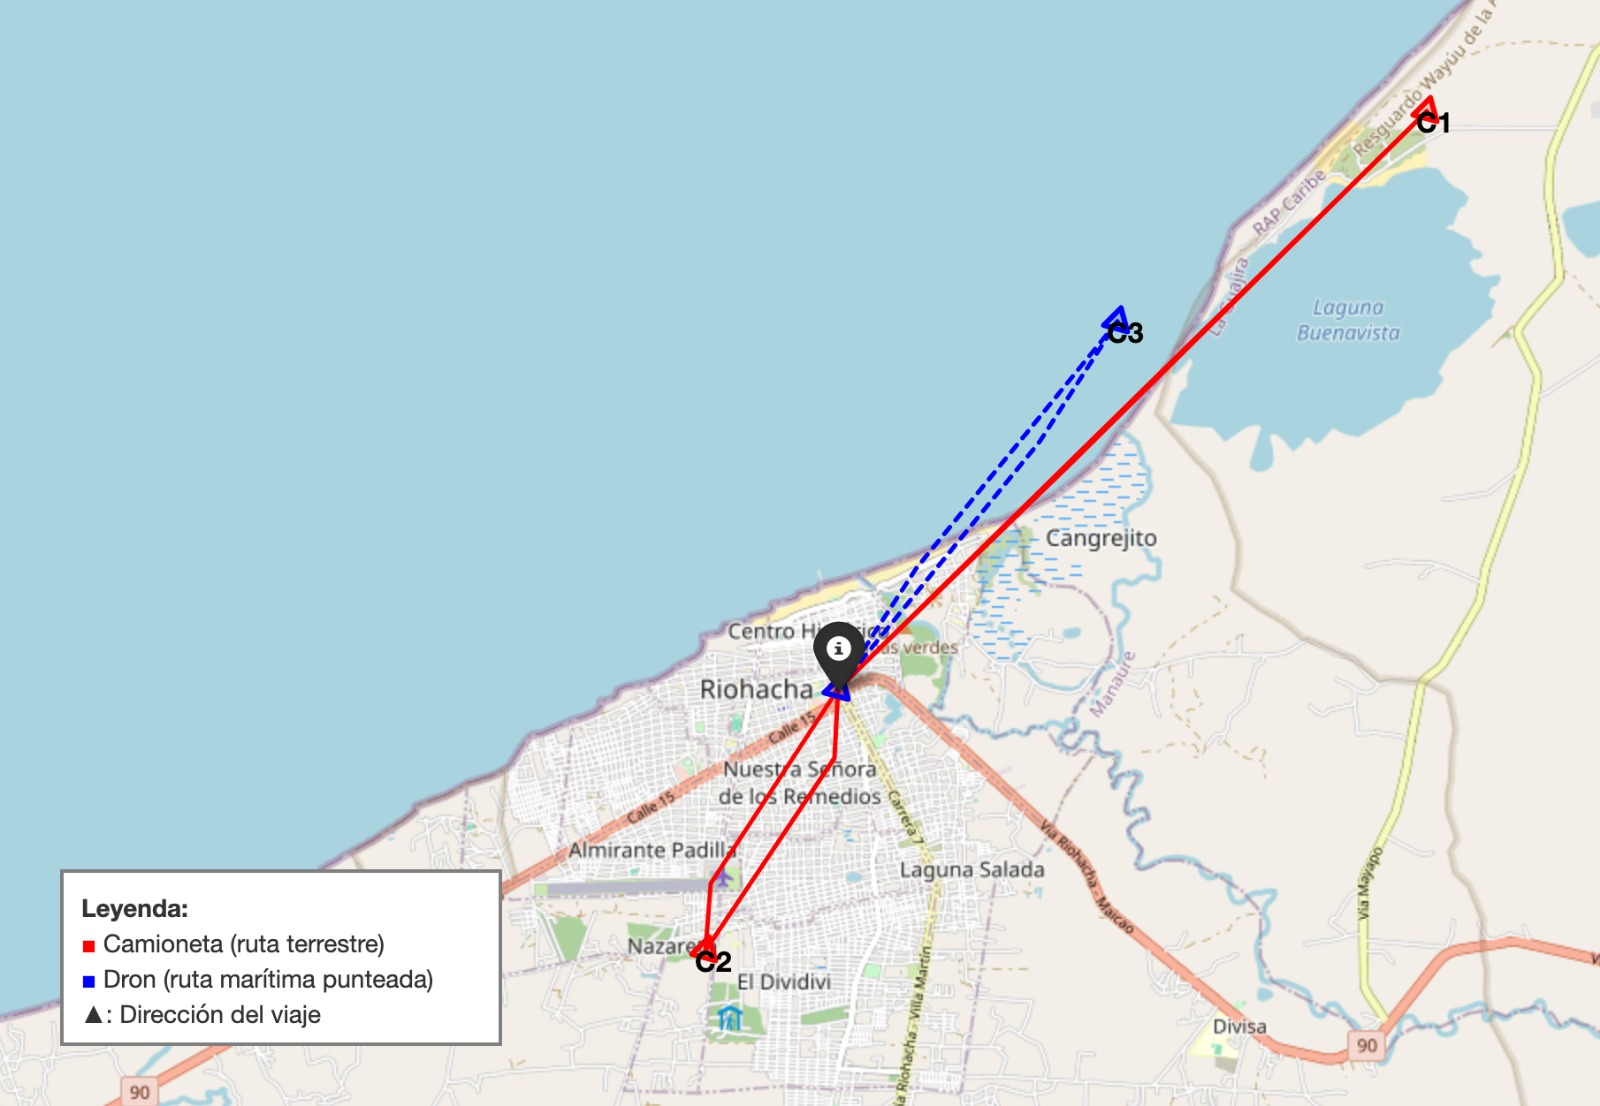

Donde las dobles flechas representan el camino de ida y regreso desde el punto de abastecimiento CD1. Como se mencionó, para este ejemplo propuesto, la camioneta debe regresar a reabastecerse después de dejar la demanda solicitada por C1 ya que la capacidad es inferior a la demanda de C1+C2.



### Conclusión

- La camioneta V1 es adecuada para cubrir a C1 y C2, pero no puede atender ambos en un solo viaje sin regresar a CD1, ya que su capacidad de 200 unidades no es suficiente para una demanda conjunta de 210 unidades.
- El cliente C3 debe ser atendido por un dron (V2 o V3), ya que está ubicado en una zona inaccesible para la camioneta.
- El modelo debe permitir múltiples viajes o reabastecimientos para cumplir con las entregas a C1 y C2 de forma eficiente.
- Aunque los drones pueden tener costos menores por trayecto, solo pueden ser considerados cuando las restricciones de capacidad, autonomía y acceso lo permitan, como en el caso de C3.


### Ejemplo ilustrativo 2

Para el caso donde la demanda sea menor a la carga, por ejemplo si se considera el ejemplo anterior, en el caso donde la demanda de C1+C2 sea menor a la capacidad de la camioneta, no es necesario que la camioneta vuelva al punto de abastecimiento al terminar de entregar en C1 sino que puede ir a C1 y de C1 seguir a C2. Y como este ejemplo se relaciona al ejemplo anterior, el punto C3 aún se ubica en una zona donde la camioneta no puede pasar. Considerando esto, el ejemplo ilustrativo se vería de la siguiente forma: 

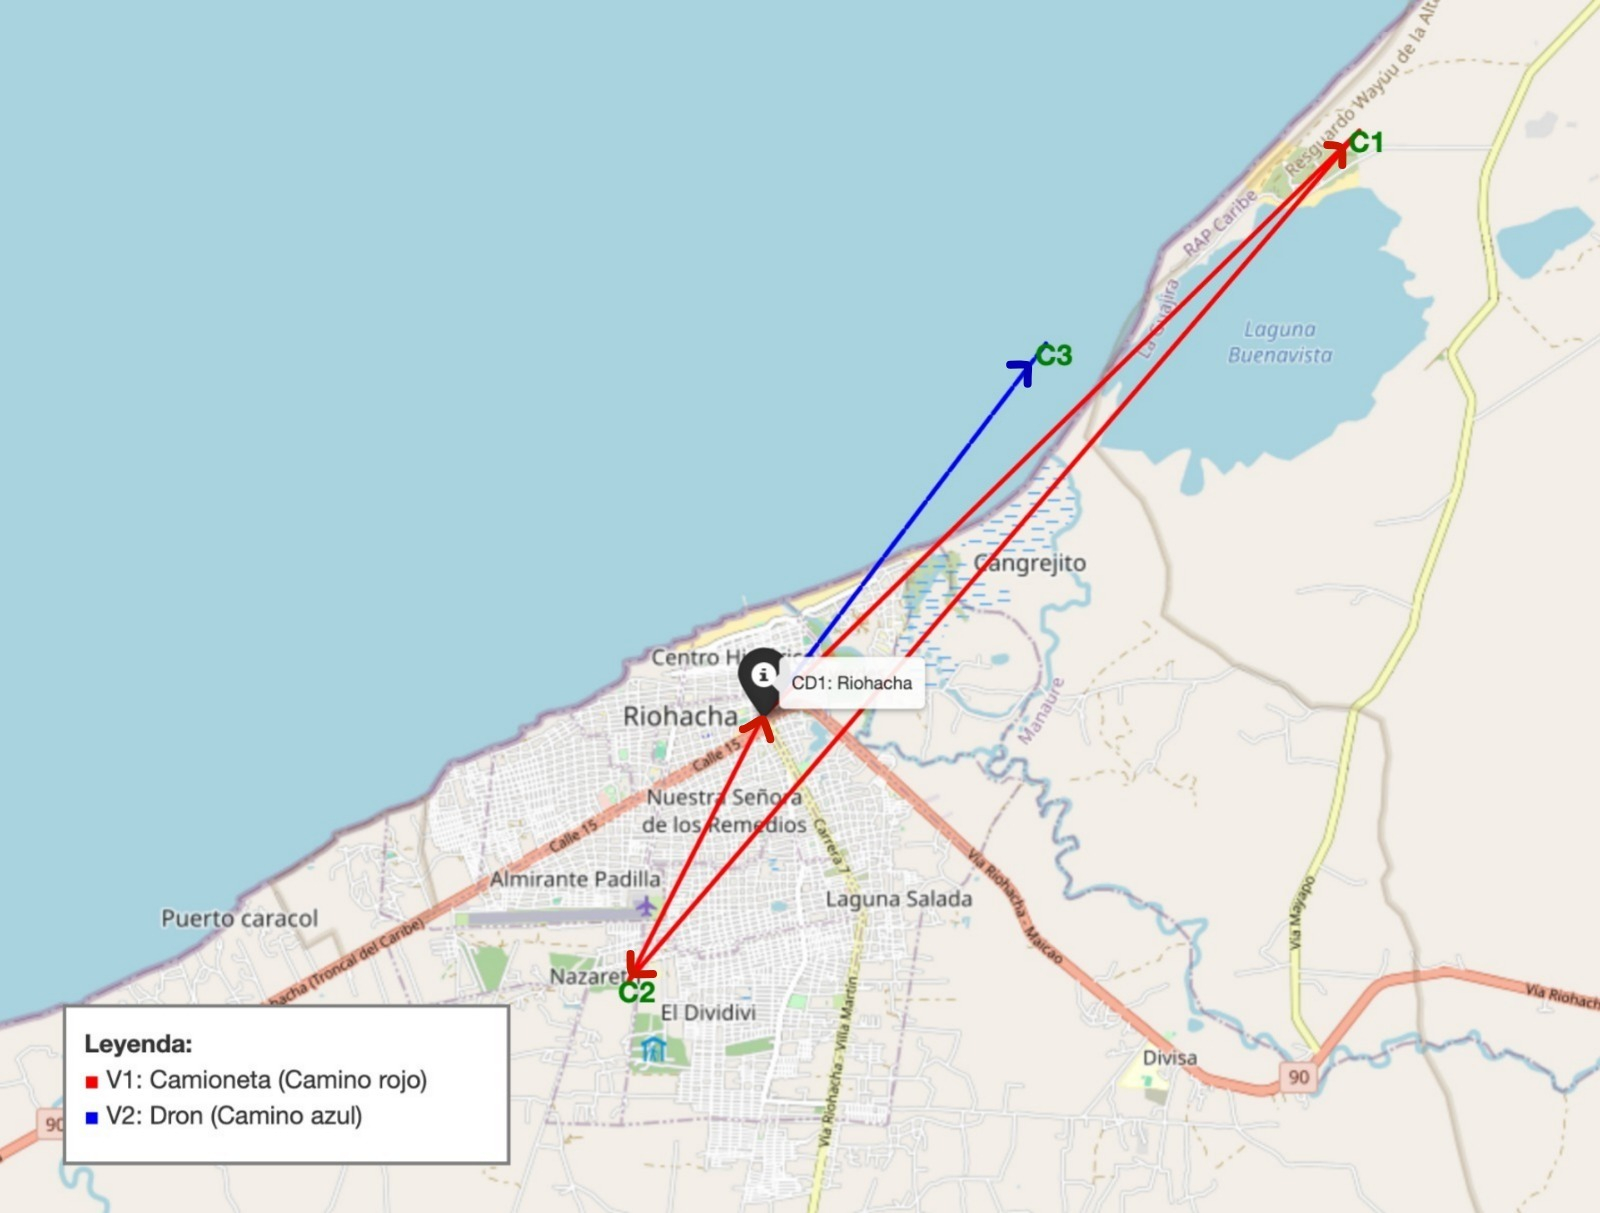

**Nota: aquí las líneas



## 8. Relevancia de los datos, las decisiones metodológicas adoptadas y los posibles impactos operativos en el contexto de LogistiCo

En el contexto del proyecto de entregas *Salva Vidas* para LogistiCo, los datos utilizados resultan altamente relevantes y están alineados con la naturaleza crítica del problema: garantizar el acceso oportuno a insumos médicos y productos esenciales en comunidades remotas de La Guajira. La información sobre ubicaciones geográficas, demandas específicas, ventanas de tiempo, capacidades y autonomías de los vehículos, así como costos operativos detallados, permite representar con fidelidad las complejidades del entorno. Las decisiones metodológicas adoptadas —como la formulación de un modelo de ruteo con asignación de vehículos bajo restricciones de tiempo y capacidad— responden directamente a las particularidades operativas del contexto rural y a la configuración de una flota híbrida. Se incorporaron ciclos de reabastecimiento y planificación de rutas múltiples, debido a la necesidad real de que los vehículos regresen al centro de distribución para continuar con su jornada. Esta decisión no solo incrementa la precisión del modelo, sino que también refleja fielmente las limitaciones físicas y logísticas del sistema. En cuanto al impacto operativo, la implementación de esta estrategia puede traducirse en una mejora significativa en la eficiencia del servicio, al reducir los tiempos de entrega y optimizar los costos, sin comprometer el cumplimiento de las ventanas de atención. Además, al integrar criterios técnicos con una visión social, el modelo propuesto tiene el potencial de fortalecer la capacidad de respuesta de LogistiCo en escenarios adversos, haciendo más sostenible y resiliente su operación en una de las regiones más vulnerables del país.